## Homework - Machine Learning Preparation

Anggota Kelompok 3

1. Muhammad Cikal Merdeka
2. Maulana Rifan Haditama
3. Maulana Ibrahim
4. Maria Meidiana Siahaan
5. Revita Rahmadini
6. Nugraha Eddy Wijayanto
7. Mochamad Ali Mustofa

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


print('numpy version : ',np.__version__)
print('pandas version : ',pd.__version__)
print('seaborn version : ',sns.__version__)

numpy version :  1.24.3
pandas version :  2.0.3
seaborn version :  0.12.2


In [ ]:
# sns.set(rc={'figure.figsize':(20.7,8.27)})
# sns.set_style("whitegrid")
# sns.color_palette("dark")
# plt.style.use("fivethirtyeight")

## Load Data

In [27]:
df = pd.read_csv('Training Data.csv')

# 1. Descriptive Statistics (15 poin)

In [3]:
df.sample(5)

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
175475,175476,8717303,55,10,single,rented,no,Drafter,Dewas,Madhya_Pradesh,10,13,0
242881,242882,6026873,48,1,single,rented,no,Surveyor,Ludhiana,Punjab,1,13,0
14643,14644,2531017,43,16,single,rented,no,Surgeon,Latur,Maharashtra,13,13,0
50261,50262,7369543,29,9,single,rented,no,Analyst,Chapra,Bihar,9,10,0
31346,31347,853458,78,19,single,owned,no,Economist,Kanpur,Uttar_Pradesh,12,12,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Id                 252000 non-null  int64 
 1   Income             252000 non-null  int64 
 2   Age                252000 non-null  int64 
 3   Experience         252000 non-null  int64 
 4   Married/Single     252000 non-null  object
 5   House_Ownership    252000 non-null  object
 6   Car_Ownership      252000 non-null  object
 7   Profession         252000 non-null  object
 8   CITY               252000 non-null  object
 9   STATE              252000 non-null  object
 10  CURRENT_JOB_YRS    252000 non-null  int64 
 11  CURRENT_HOUSE_YRS  252000 non-null  int64 
 12  Risk_Flag          252000 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 25.0+ MB


In [5]:
# pengelompokan kolom berdasarkan jenisnya
cats = ['Married/Single', 'House_Ownership', 'Car_Ownership', 'Profession', 'CITY', 'STATE']
nums = ['Id', 'Income', 'Age', 'Experience', 'CURRENT_JOB_YRS', 'CURRENT_HOUSE_YRS', 'Risk_Flag']

In [6]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Id,252000.0,1.260005e+05,7.274628e+04,1.0,63000.75,126000.5,189000.25,252000.0
Income,252000.0,4.997117e+06,2.878311e+06,10310.0,2503015.00,5000694.5,7477502.00,9999938.0
Age,252000.0,4.995407e+01,1.706385e+01,21.0,35.00,50.0,65.00,79.0
Experience,252000.0,1.008444e+01,6.002590e+00,0.0,5.00,10.0,15.00,20.0
CURRENT_JOB_YRS,252000.0,6.333877e+00,3.647053e+00,0.0,3.00,6.0,9.00,14.0
CURRENT_HOUSE_YRS,252000.0,1.199779e+01,1.399037e+00,10.0,11.00,12.0,13.00,14.0
Risk_Flag,252000.0,1.230000e-01,3.284379e-01,0.0,0.00,0.0,0.00,1.0


In [7]:
df[cats].describe().transpose()

,count,unique,top,freq
Married/Single,252000,2,single,226272
House_Ownership,252000,3,rented,231898
Car_Ownership,252000,2,no,176000
Profession,252000,51,Physician,5957
CITY,252000,317,Vijayanagaram,1259
STATE,252000,29,Uttar_Pradesh,28400


In [8]:
for col in cats:
    print(f'''Value count kolom {col}:''')
    print(df[col].value_counts(), '\n')

Value count kolom Married/Single:
Married/Single
single     226272
married     25728
Name: count, dtype: int64 

Value count kolom House_Ownership:
House_Ownership
rented          231898
owned            12918
norent_noown      7184
Name: count, dtype: int64 

Value count kolom Car_Ownership:
Car_Ownership
no     176000
yes     76000
Name: count, dtype: int64 

Value count kolom Profession:
Profession
Physician                     5957
Statistician                  5806
Web_designer                  5397
Psychologist                  5390
Computer_hardware_engineer    5372
Drafter                       5359
Magistrate                    5357
Fashion_Designer              5304
Air_traffic_controller        5281
Comedian                      5259
Industrial_Engineer           5250
Mechanical_engineer           5217
Chemical_engineer             5205
Technical_writer              5195
Hotel_Manager                 5178
Financial_Analyst             5167
Graphic_Designer              5166


# Jawaban nomor 1 Descriptive Statistics

* A. Semua tipe data sudah sesuai.

* B. Semua tipe data sudah sesuai.

* C. Semua tipe data sudah sesuai.

# 2. Univariate Analysis (25 poin)


## Numerical

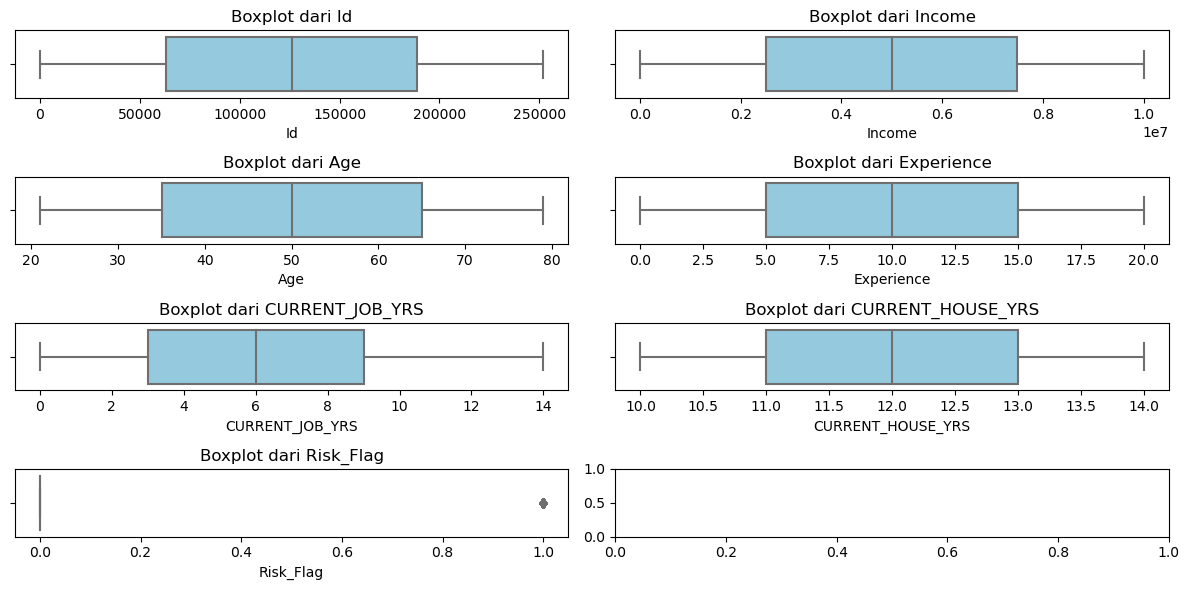

In [10]:
# Versi 2
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(12, 6))
axes = axes.flatten()

for i in range(len(nums)):
    if i < 4 * 2:
        sns.boxplot(ax=axes[i], x=df[nums[i]], orient='h', color='skyblue')
        axes[i].set_title(f'Boxplot dari {nums[i]}')
    else:
        fig.delaxes(axes[i])

plt.tight_layout();

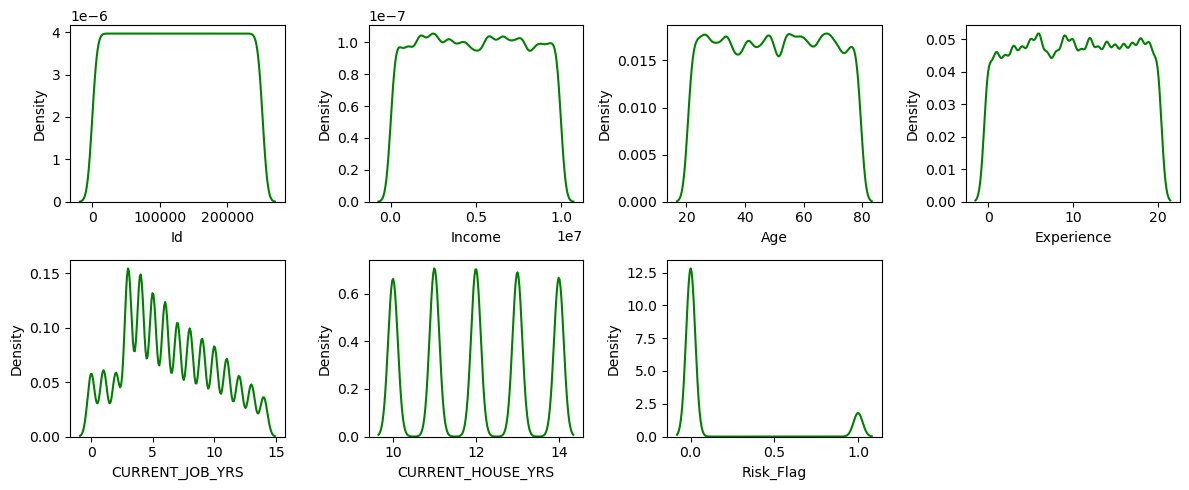

In [11]:
#Kdeplot
plt.figure(figsize=(12, 5))
for i in range(0, len(nums)) :
    plt.subplot(2, 4, i+1)
    sns.kdeplot(x = df[nums[i]], color='green')
    plt.tight_layout()

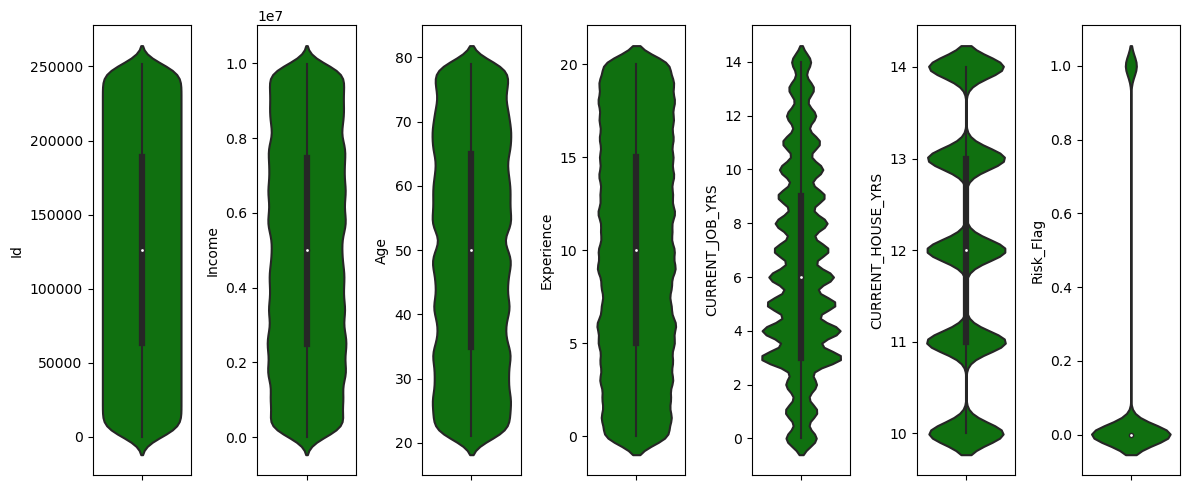

In [12]:
#Violinplot
plt.figure(figsize=(12, 5))
for i in range(0, len(nums)):
    plt.subplot(1, len(nums), i+1)
    sns.violinplot(y = df[nums[i]], color='green', orient='v')
    plt.tight_layout()

## Categorical

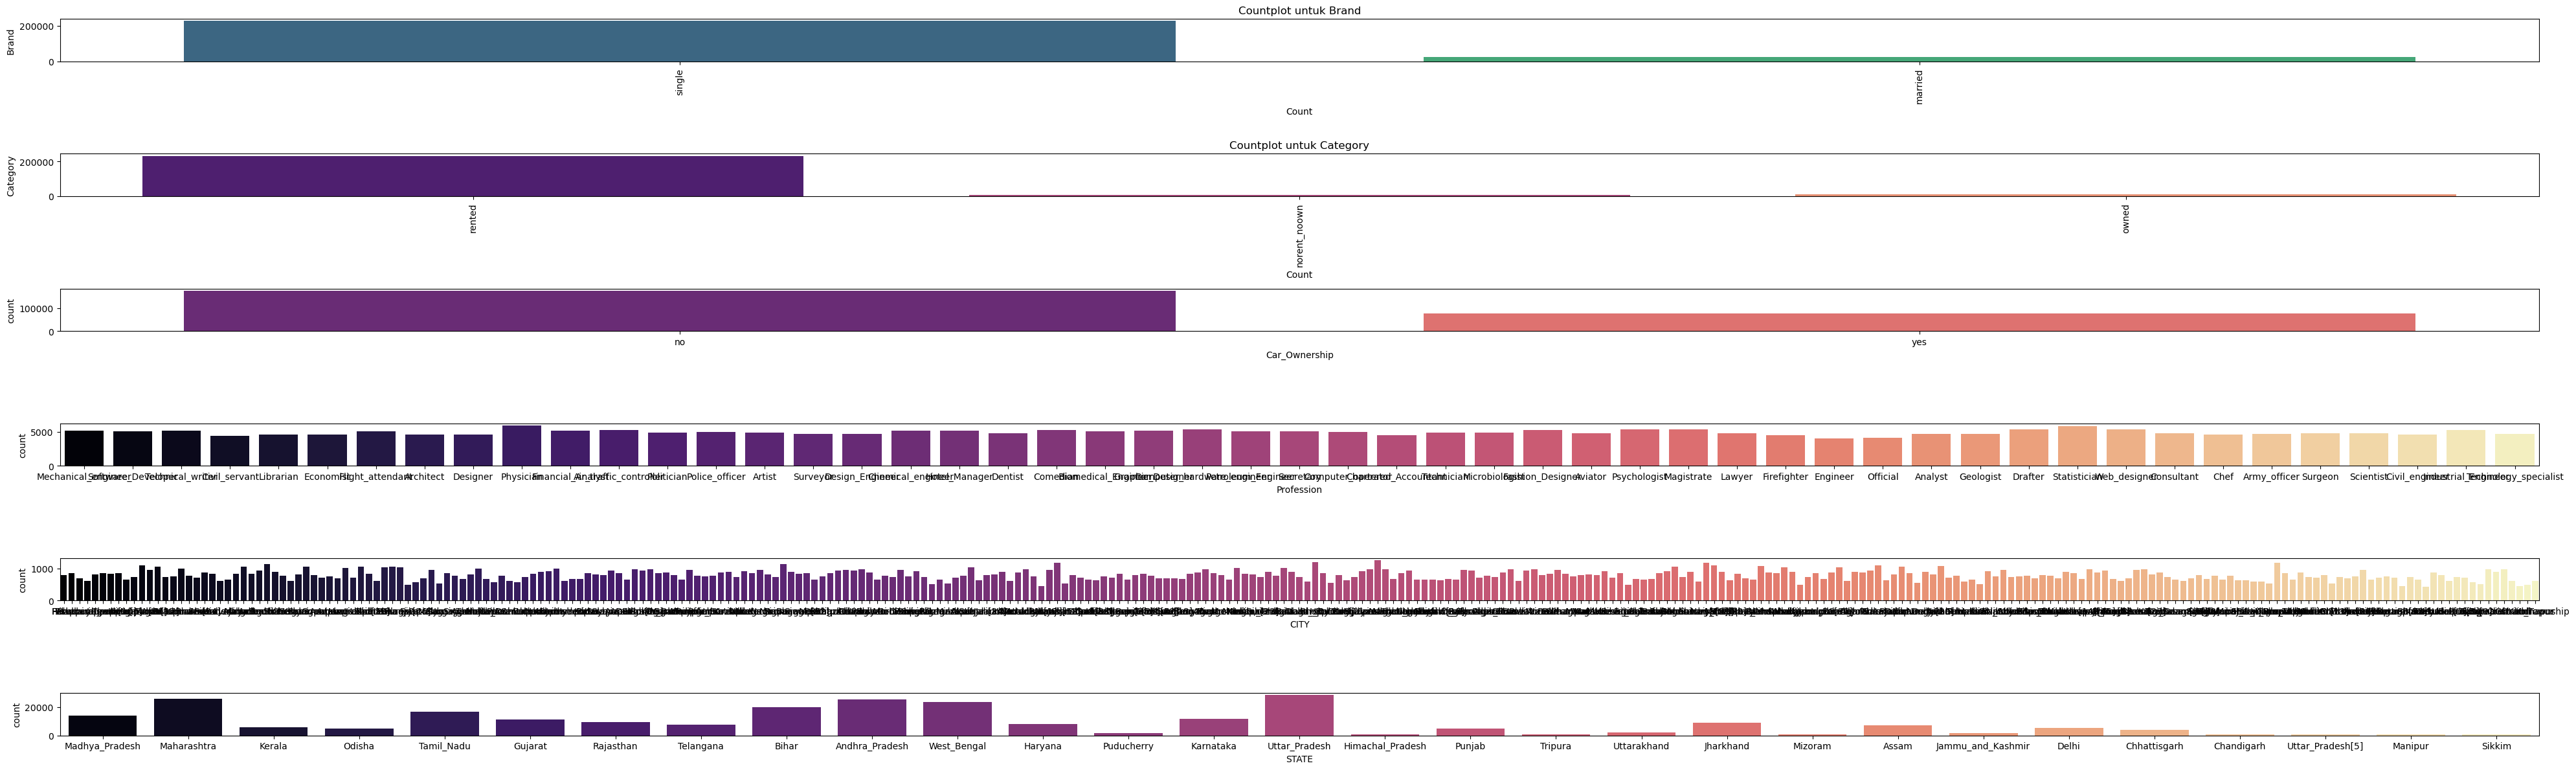

In [18]:
#Versi horizontal
fig, axes = plt.subplots(nrows=6, ncols=1, figsize=(40,12))
brand_plot = sns.countplot(ax=axes[0], data=df, x='Married/Single', palette='viridis')
axes[0].set_title('Countplot untuk Brand')
axes[0].set_ylabel('Brand')
axes[0].set_xlabel('Count')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90)

category_plot = sns.countplot(ax=axes[1], data=df, x='House_Ownership', palette='magma')
axes[1].set_title('Countplot untuk Category')
axes[1].set_ylabel('Category')
axes[1].set_xlabel('Count')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=90)

category_plot = sns.countplot(ax=axes[2], data=df, x='Car_Ownership', palette='magma')
axes[1].set_title('Countplot untuk Category')
axes[1].set_ylabel('Category')
axes[1].set_xlabel('Count')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=90)

category_plot = sns.countplot(ax=axes[3], data=df, x='Profession', palette='magma')
axes[1].set_title('Countplot untuk Category')
axes[1].set_ylabel('Category')
axes[1].set_xlabel('Count')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=90)

category_plot = sns.countplot(ax=axes[4], data=df, x='CITY', palette='magma')
axes[1].set_title('Countplot untuk Category')
axes[1].set_ylabel('Category')
axes[1].set_xlabel('Count')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=90)

category_plot = sns.countplot(ax=axes[5], data=df, x='STATE', palette='magma')
axes[1].set_title('Countplot untuk Category')
axes[1].set_ylabel('Category')
axes[1].set_xlabel('Count')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=90)

plt.tight_layout()
plt.show()

# Jawaban nomor 2 Univariate Analysis

* Untuk analisis pada kolom numerical, ditemukan beberapa hal seperti :

1. Untuk target (Risk_Flag) distribusinya merupakan bimodal dan cukup mendominasi pada nilai 0

2. Untuk feature CURRENT_JOB_YRS memiliki distribusi positive skewed

3. Untuk feature id karena tidak memiliki makna yang penting dalam hal ini dapat di-drop pada saat pre-processing

4. Untuk analisis pada kolom Profession dan CITY, ditemukan bahwa kategori pada feature yang terlalu banyak untuk dilakukan plotting

# 3. Multivariate Analysis (15 poin)

In [28]:
df = df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = round(df.corr(), 2)
correlation_matrix

,Id,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
Id,1.00,-0.00,-0.00,-0.01,-0.00,0.00,0.03
Income,-0.00,1.00,-0.00,0.01,0.01,-0.00,-0.00
Age,-0.00,-0.00,1.00,-0.00,0.00,-0.02,-0.02
Experience,-0.01,0.01,-0.00,1.00,0.65,0.02,-0.03
CURRENT_JOB_YRS,-0.00,0.01,0.00,0.65,1.00,0.01,-0.02
CURRENT_HOUSE_YRS,0.00,-0.00,-0.02,0.02,0.01,1.00,-0.00
Risk_Flag,0.03,-0.00,-0.02,-0.03,-0.02,-0.00,1.00


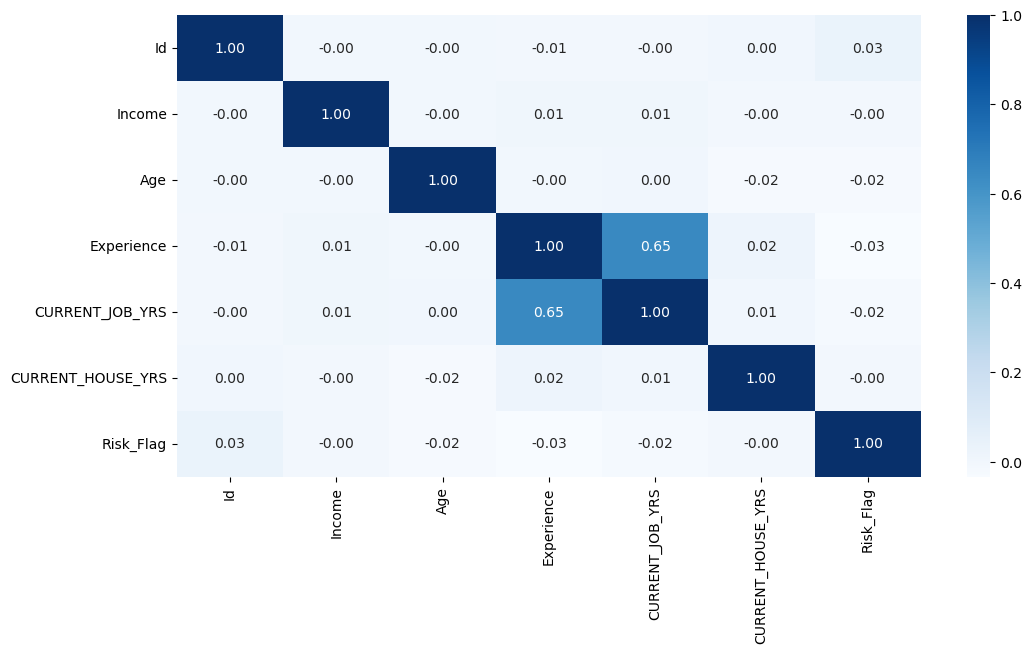

In [29]:
#Heatmap
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(), cmap='Blues', annot=True, fmt='.2f');

# Jawaban nomor 3 Multivariate Analysis

* Semua fitur relevan dan harus dipertahankan